# Etapa 3 - Machine Learning

## Imports

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, matthews_corrcoef, ConfusionMatrixDisplay, precision_score)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV

%matplotlib inline

warnings.filterwarnings('ignore')

# rand = 1483433244

# Functions

Metrics

In [2]:
def metrics(label_test, predict):
    print('METRICS:')
    print(f"Accuracy score:\n{accuracy_score(label_test, predict)}\n")
    print(f"Recall score:\n{recall_score(label_test, predict, average='weighted')}\n")
    print(f"Precison score:\n{precision_score(label_test, predict, average='weighted', zero_division=0)}\n")
    print(f"F1-score:\n{f1_score(label_test, predict, average='weighted')}\n")
    print(f"MCC score:\n{matthews_corrcoef(label_test, predict)}\n")
    print(f"Confusion matrix:\n{confusion_matrix(label_test, predict)}\n")
    print(f"Classification report:\n{classification_report(label_test, predict, zero_division=True)}\n")
    ConfusionMatrixDisplay(confusion_matrix(label_test, predict)).plot(cmap=plt.cm.Blues)


ML

In [3]:
def ml(model, dataset, labels, param=None, rand=None):
    # SPLIT
    data_train, data_test, label_train, label_test = train_test_split(dataset, labels, test_size=0.3)

    # k-fold
    kfold = StratifiedKFold(n_splits=5, random_state=rand, shuffle=False)
    # Cross validation
    scores_scoring = cross_val_score(model, X=data_train, y=label_train, cv=kfold, scoring='accuracy')
    print(f'Cross Validation accuracy score: {np.mean(scores_scoring)}\n')

    # model training - FIT
    model.fit(data_train, label_train)

    # PREDICT
    predict = model.predict(X=data_test)
    base_model = accuracy_score(label_test, predict)
    print('Base Model Accuracy: {:.3f}\n'.format(base_model))

    if param != None:
        ## OPTIMIZATION
        search = HalvingGridSearchCV(estimator=model, param_grid=param, cv=kfold, scoring='accuracy', random_state=rand,
                                     n_jobs=-1)
        # search = HalvingRandomSearchCV(estimator=model, param_distributions=param, cv=kfold, scoring='accuracy',
        #                                random_state=rand, n_jobs=-1)
        search.fit(X=data_train, y=label_train)

        best_params = search.best_params_
        print(f'{best_params}\n')
        # OPTI MODEL FITTED
        best_model = search.best_estimator_
        predict_opt = best_model.predict(X=data_test)
        opt_model = accuracy_score(label_test, predict_opt)
        print('Optimized Model Accuracy: {:.3f}\n'.format(opt_model))

        improv = ((opt_model-base_model)/base_model*100)
        print('Optimized model improved {:.3f}% over base model.\n'.format(improv))

        if improv >= 0:
            predict = predict_opt

    # Metrics
    metrics(label_test, predict)

The *ml* function will firstly do a cross validation to evaluate the model adaptation to the data. Secondly, it will fit the model and then predict the test set labels and it's corresponding accuracy. Lastly, it will do a hyperparameter optimization and then use the best parameters to predict the test set labels and it's accuracy.

# Models

In [4]:
rf = RandomForestClassifier(n_jobs=-1)
nb = GaussianNB()
knn = KNeighborsClassifier(n_jobs=-1)
voting = VotingClassifier(estimators=[('Random Forest', rf), ('Naive Bayes', nb), ('KNN', knn)], voting='soft', n_jobs=-1)
nn = MLPClassifier(early_stopping=True)

# Hyperparameters

In [5]:
params_rf = {'n_estimators': range(10, 211, 50), 'criterion': ['entropy', 'gini'], 'max_features': ['sqrt', 'log2', None],
          'bootstrap': [True, False]}
params_knn = {'n_neighbors': range(2, 11, 2), 'weights': ['distance', 'uniform'], 'leaf_size': range(10, 50, 10), 'p': [1, 2]}
params_nn = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Binary Classification

### Load data

In [6]:
descriptors = pd.read_csv('../dataset/binary_class/descriptors_fs.csv', sep=',')
fingerprint = pd.read_csv('../dataset/binary_class/rdk_fs.csv', sep=',')

descriptors_data_b = descriptors.drop("activity", axis=1)
descriptors_label_b = descriptors["activity"]
fingerprint_data_b = fingerprint.drop("activity", axis=1)
fingerprint_label_b = fingerprint["activity"]

## Descriptors

### Random Forest

In [7]:
ml(rf, descriptors_data_b, descriptors_label_b, params_rf)

Cross Validation accuracy score: 0.8148046265343278

Base Model Accuracy: 0.814



KeyboardInterrupt: 

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.6983421540658163

Base Model Accuracy: 0.699

METRICS:
Accuracy score:
0.6989247311827957

Recall score:
0.6989247311827957

Precison score:
0.6996827491688027

F1-score:
0.6986587663236885

MCC score:
0.39862870357232666

Confusion matrix:
[[4367 1624]
 [1988 4018]]

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      5991
           1       0.71      0.67      0.69      6006

    accuracy                           0.70     11997
   macro avg       0.70      0.70      0.70     11997
weighted avg       0.70      0.70      0.70     11997




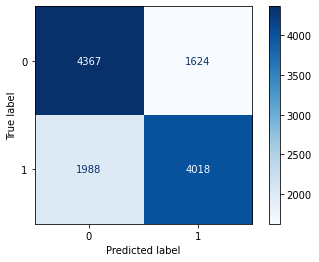

In [ ]:
ml(nb, descriptors_data_b, descriptors_label_b, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.7899041967696856

Base Model Accuracy: 0.801

METRICS:
Accuracy score:
0.8007835292156372

Recall score:
0.8007835292156372

Precison score:
0.8016774282710658

F1-score:
0.8006304111294796

MCC score:
0.6024518861026281

Confusion matrix:
[[4972 1031]
 [1359 4635]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6003
           1       0.82      0.77      0.80      5994

    accuracy                           0.80     11997
   macro avg       0.80      0.80      0.80     11997
weighted avg       0.80      0.80      0.80     11997




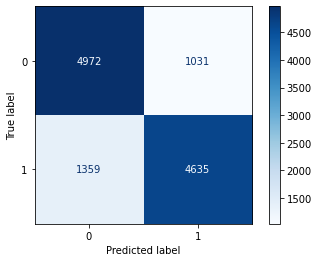

In [ ]:
ml(knn, descriptors_data_b, descriptors_label_b, params_knn)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.7710416121492629

Base Model Accuracy: 0.770

METRICS:
Accuracy score:
0.7700258397932817

Recall score:
0.7700258397932817

Precison score:
0.7707708755203944

F1-score:
0.7697137388627614

MCC score:
0.5404659323758255

Confusion matrix:
[[4892 1201]
 [1558 4346]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6093
           1       0.78      0.74      0.76      5904

    accuracy                           0.77     11997
   macro avg       0.77      0.77      0.77     11997
weighted avg       0.77      0.77      0.77     11997




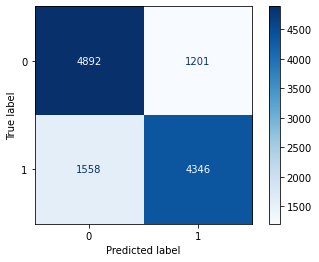

In [ ]:
ml(voting, descriptors_data_b, descriptors_label_b, None)

### Neural Network

Cross Validation accuracy score: 0.8001572398378443

Base Model Accuracy: 0.803

METRICS:
Accuracy score:
0.8027006751687922

Recall score:
0.8027006751687922

Precison score:
0.8029833234204763

F1-score:
0.8026383359207551

MCC score:
0.6056532530902224

Confusion matrix:
[[4696 1279]
 [1088 4934]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5975
           1       0.79      0.82      0.81      6022

    accuracy                           0.80     11997
   macro avg       0.80      0.80      0.80     11997
weighted avg       0.80      0.80      0.80     11997




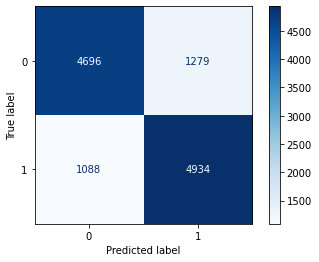

In [ ]:
ml(nn, descriptors_data_b, descriptors_label_b, params_nn)

## Fingerprints

### Random Forest

Cross Validation accuracy score: 0.805380177813358

Base Model Accuracy: 0.817

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 210}

Optimized Model Accuracy: 0.818

Optimized model improved 0.194% over base model.

METRICS:
Accuracy score:
0.8183712594815371

Recall score:
0.8183712594815371

Precison score:
0.8187676164335559

F1-score:
0.8183441356347549

MCC score:
0.637163599498311

Confusion matrix:
[[4963  990]
 [1189 4855]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5953
           1       0.83      0.80      0.82      6044

    accuracy                           0.82     11997
   macro avg       0.82      0.82      0.82     11997
weighted avg       0.82      0.82      0.82     11997




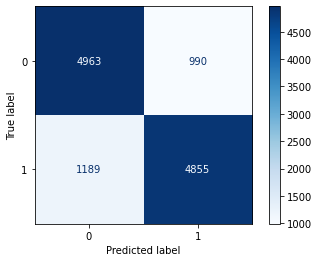

In [ ]:
ml(rf, fingerprint_data_b, fingerprint_label_b, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.6621656459987719

Base Model Accuracy: 0.664

METRICS:
Accuracy score:
0.6637492706509961

Recall score:
0.6637492706509961

Precison score:
0.663859758292859

F1-score:
0.6637688028629338

MCC score:
0.32752780337466125

Confusion matrix:
[[3934 1973]
 [2061 4029]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      5907
           1       0.67      0.66      0.67      6090

    accuracy                           0.66     11997
   macro avg       0.66      0.66      0.66     11997
weighted avg       0.66      0.66      0.66     11997




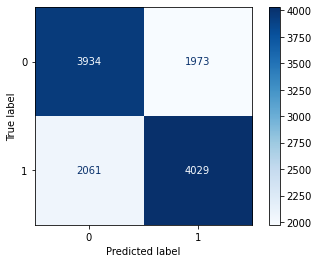

In [ ]:
ml(nb, fingerprint_data_b, fingerprint_label_b, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.7734079562132803

Base Model Accuracy: 0.785

METRICS:
Accuracy score:
0.7847795282153872

Recall score:
0.7847795282153872

Precison score:
0.7895809544882137

F1-score:
0.7838694160989287

MCC score:
0.5743191634410555

Confusion matrix:
[[5099  904]
 [1678 4316]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      6003
           1       0.83      0.72      0.77      5994

    accuracy                           0.78     11997
   macro avg       0.79      0.78      0.78     11997
weighted avg       0.79      0.78      0.78     11997




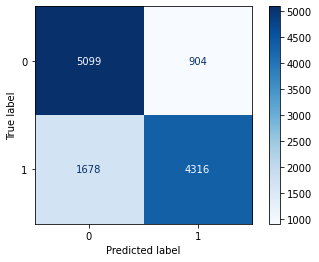

In [ ]:
ml(knn, fingerprint_data_b, fingerprint_label_b, params_knn)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.7483658051273767

Base Model Accuracy: 0.761

METRICS:
Accuracy score:
0.7605234641993832

Recall score:
0.7605234641993832

Precison score:
0.7607767723047341

F1-score:
0.7604406510377094

MCC score:
0.5212577273656317

Confusion matrix:
[[4687 1337]
 [1536 4437]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      6024
           1       0.77      0.74      0.76      5973

    accuracy                           0.76     11997
   macro avg       0.76      0.76      0.76     11997
weighted avg       0.76      0.76      0.76     11997




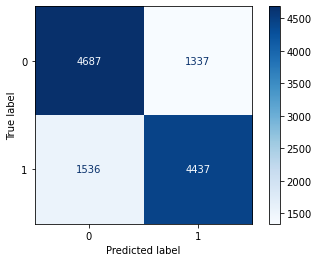

In [ ]:
ml(voting, fingerprint_data_b, fingerprint_label_b, None)

### Neural Network

Cross Validation accuracy score: 0.7750870890600137

Base Model Accuracy: 0.780

METRICS:
Accuracy score:
0.7800283404184379

Recall score:
0.7800283404184379

Precison score:
0.780131518137668

F1-score:
0.780028933416382

MCC score:
0.5601586241369071

Confusion matrix:
[[4677 1271]
 [1368 4681]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5948
           1       0.79      0.77      0.78      6049

    accuracy                           0.78     11997
   macro avg       0.78      0.78      0.78     11997
weighted avg       0.78      0.78      0.78     11997




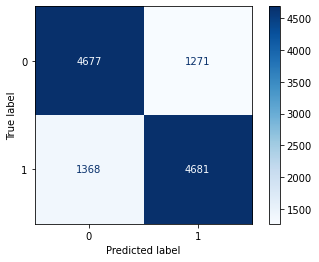

In [ ]:
ml(nn, fingerprint_data_b, fingerprint_label_b, params_nn)

# Multiclass

### Load data

In [ ]:
descriptors = pd.read_csv('../dataset/multiclass/descriptors_fs.csv', sep=',')
fingerprint = pd.read_csv('../dataset/multiclass/rdk_fs.csv', sep=',')

descriptors_data_m = descriptors.drop("Activity at 46.23 uM", axis=1)
descriptors_label_m = descriptors["Activity at 46.23 uM"]
fingerprint_data_m = fingerprint.drop("Activity at 46.23 uM", axis=1)
fingerprint_label_m = fingerprint["Activity at 46.23 uM"]

### Random Forest

Cross Validation accuracy score: 0.5722349363029342

Base Model Accuracy: 0.573

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 160}

Optimized Model Accuracy: 0.573

Optimized model improved -0.015% over base model.

METRICS:
Accuracy score:
0.5728098691339502

Recall score:
0.5728098691339502

Precison score:
0.5315649127483056

F1-score:
0.5207672394274804

MCC score:
0.3540775376900386

Confusion matrix:
[[ 167 1096  286    8]
 [ 205 3262  880   13]
 [  25  888 3320  206]
 [   4  210 1304  123]]

Classification report:
              precision    recall  f1-score   support

           0       0.42      0.11      0.17      1557
           1       0.60      0.75      0.66      4360
           2       0.57      0.75      0.65      4439
           3       0.35      0.07      0.12      1641

    accuracy                           0.57     11997
   macro avg       0.48      0.42      0.40     11997
weighted avg       0.53      0.57      0.52     11997


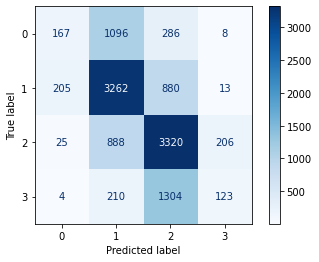

In [ ]:
ml(rf, descriptors_data_m, descriptors_label_m, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.3898975095141843

Base Model Accuracy: 0.391

METRICS:
Accuracy score:
0.3907643577561057

Recall score:
0.3907643577561057

Precison score:
0.4032951322935615

F1-score:
0.3816002111266297

MCC score:
0.1567934711621916

Confusion matrix:
[[ 232  848  283  230]
 [ 519 2479  913  487]
 [ 204 1256 1143 1805]
 [  59  335  370  834]]

Classification report:
              precision    recall  f1-score   support

           0       0.23      0.15      0.18      1593
           1       0.50      0.56      0.53      4398
           2       0.42      0.26      0.32      4408
           3       0.25      0.52      0.34      1598

    accuracy                           0.39     11997
   macro avg       0.35      0.37      0.34     11997
weighted avg       0.40      0.39      0.38     11997




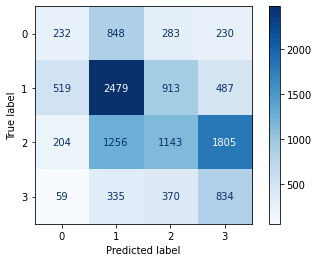

In [ ]:
ml(nb, descriptors_data_m, descriptors_label_m, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.5116462000276807

Base Model Accuracy: 0.524

METRICS:
Accuracy score:
0.523964324414437

Recall score:
0.523964324414437

Precison score:
0.4954988965809712

F1-score:
0.502307907850381

MCC score:
0.2953401072502687

Confusion matrix:
[[ 345  970  242   12]
 [ 635 2918  761   58]
 [ 184  974 2795  433]
 [  55  243 1144  228]]

Classification report:
              precision    recall  f1-score   support

           0       0.28      0.22      0.25      1569
           1       0.57      0.67      0.62      4372
           2       0.57      0.64      0.60      4386
           3       0.31      0.14      0.19      1670

    accuracy                           0.52     11997
   macro avg       0.43      0.42      0.41     11997
weighted avg       0.50      0.52      0.50     11997




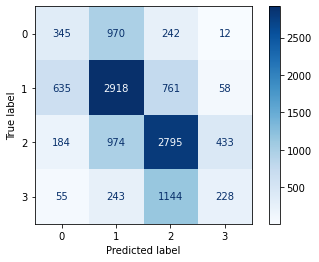

In [ ]:
ml(knn, descriptors_data_m, descriptors_label_m, params_knn)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.5042511036364441

Base Model Accuracy: 0.508

METRICS:
Accuracy score:
0.5078769692423106

Recall score:
0.5078769692423106

Precison score:
0.4861654413407073

F1-score:
0.49055656988157453

MCC score:
0.2737328976862254

Confusion matrix:
[[ 190 1007  313   99]
 [ 337 2979  955  180]
 [  91  944 2490  853]
 [  25  202  898  434]]

Classification report:
              precision    recall  f1-score   support

           0       0.30      0.12      0.17      1609
           1       0.58      0.67      0.62      4451
           2       0.53      0.57      0.55      4378
           3       0.28      0.28      0.28      1559

    accuracy                           0.51     11997
   macro avg       0.42      0.41      0.40     11997
weighted avg       0.49      0.51      0.49     11997




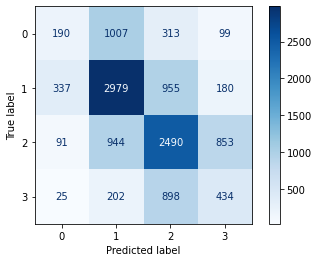

In [ ]:
ml(voting, descriptors_data_m, descriptors_label_m, None)

### Neural Network

Cross Validation accuracy score: 0.5552658531824541

Base Model Accuracy: 0.559

METRICS:
Accuracy score:
0.5591397849462365

Recall score:
0.5591397849462365

Precison score:
0.5078475214412057

F1-score:
0.4802062220556554

MCC score:
0.3256064068682482

Confusion matrix:
[[  36 1200  339    0]
 [  58 3395  985    1]
 [  13 1094 3273    5]
 [   7  254 1333    4]]

Classification report:
              precision    recall  f1-score   support

           0       0.32      0.02      0.04      1575
           1       0.57      0.76      0.65      4439
           2       0.55      0.75      0.63      4385
           3       0.40      0.00      0.00      1598

    accuracy                           0.56     11997
   macro avg       0.46      0.38      0.33     11997
weighted avg       0.51      0.56      0.48     11997




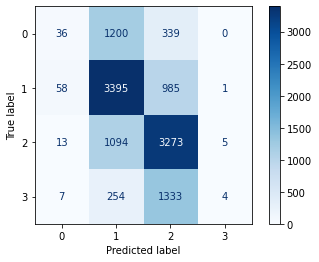

In [ ]:
ml(nn, descriptors_data_m, descriptors_label_m, params_nn)

## Fingerprints

### Random Forest

Cross Validation accuracy score: 0.5472437819211962

Base Model Accuracy: 0.547

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 210}

Optimized Model Accuracy: 0.549

Optimized model improved 0.274% over base model.

METRICS:
Accuracy score:
0.548803867633575

Recall score:
0.548803867633575

Precison score:
0.5093566328365664

F1-score:
0.5170140621694711

MCC score:
0.3244774002202486

Confusion matrix:
[[ 240 1064  266   18]
 [ 424 3041  904   59]
 [  63  768 3093  445]
 [  12  199 1191  210]]

Classification report:
              precision    recall  f1-score   support

           0       0.32      0.15      0.21      1588
           1       0.60      0.69      0.64      4428
           2       0.57      0.71      0.63      4369
           3       0.29      0.13      0.18      1612

    accuracy                           0.55     11997
   macro avg       0.44      0.42      0.41     11997
weighted avg       0.51      0.55      0.52     11997




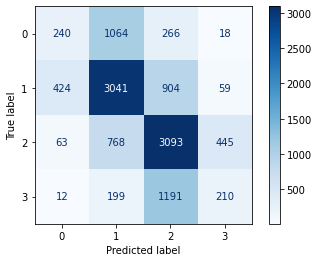

In [ ]:
ml(rf, fingerprint_data_m, fingerprint_label_m, params_rf)

### Gaussian Naive Bayes

Cross Validation accuracy score: 0.3536237937655508

Base Model Accuracy: 0.352

METRICS:
Accuracy score:
0.35183795948987245

Recall score:
0.35183795948987245

Precison score:
0.39139596377727126

F1-score:
0.35297628856523755

MCC score:
0.12694688256900294

Confusion matrix:
[[ 335  730  257  258]
 [ 801 2088  753  749]
 [ 462 1111 1006 1853]
 [ 131  328  343  792]]

Classification report:
              precision    recall  f1-score   support

           0       0.19      0.21      0.20      1580
           1       0.49      0.48      0.48      4391
           2       0.43      0.23      0.30      4432
           3       0.22      0.50      0.30      1594

    accuracy                           0.35     11997
   macro avg       0.33      0.35      0.32     11997
weighted avg       0.39      0.35      0.35     11997




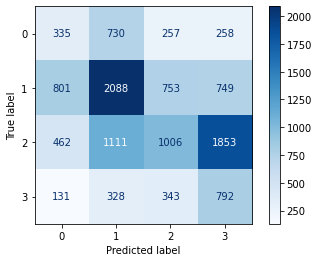

In [ ]:
ml(nb, fingerprint_data_m, fingerprint_label_m, None)

### K Nearest Neighbors

Cross Validation accuracy score: 0.5106629054683054

Base Model Accuracy: 0.516

METRICS:
Accuracy score:
0.5162957406018172

Recall score:
0.5162957406018172

Precison score:
0.48672097558069605

F1-score:
0.4955956791416732

MCC score:
0.28294694288963496

Confusion matrix:
[[ 347  926  330   38]
 [ 649 2627  980   90]
 [ 153  802 3019  472]
 [  40  206 1117  201]]

Classification report:
              precision    recall  f1-score   support

           0       0.29      0.21      0.25      1641
           1       0.58      0.60      0.59      4346
           2       0.55      0.68      0.61      4446
           3       0.25      0.13      0.17      1564

    accuracy                           0.52     11997
   macro avg       0.42      0.41      0.40     11997
weighted avg       0.49      0.52      0.50     11997




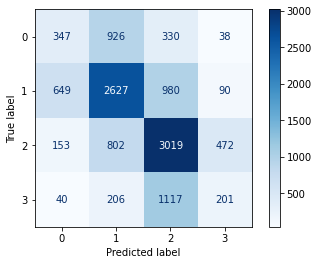

In [ ]:
ml(knn, fingerprint_data_m, fingerprint_label_m, params_knn)

### Voting Classifier
This model will include all the previous models.

Cross Validation accuracy score: 0.463437213594195

Base Model Accuracy: 0.469

METRICS:
Accuracy score:
0.46861715428857215

Recall score:
0.46861715428857215

Precison score:
0.47616971690671994

F1-score:
0.47047097283348305

MCC score:
0.24294116132293417

Confusion matrix:
[[ 304  844  290  157]
 [ 638 2561  848  363]
 [ 219  770 2203 1201]
 [  57  211  777  554]]

Classification report:
              precision    recall  f1-score   support

           0       0.25      0.19      0.22      1595
           1       0.58      0.58      0.58      4410
           2       0.53      0.50      0.52      4393
           3       0.24      0.35      0.29      1599

    accuracy                           0.47     11997
   macro avg       0.40      0.40      0.40     11997
weighted avg       0.48      0.47      0.47     11997




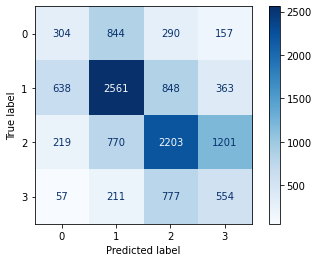

In [ ]:
ml(voting, fingerprint_data_m, fingerprint_label_m, None)

### Neural Network

Cross Validation accuracy score: 0.5363121419438894

Base Model Accuracy: 0.532

METRICS:
Accuracy score:
0.5322163874301908

Recall score:
0.5322163874301908

Precison score:
0.4810984029617236

F1-score:
0.4819436994223754

MCC score:
0.2927074957678842

Confusion matrix:
[[ 129 1210  239   18]
 [ 209 3251  824   32]
 [  86 1247 2893  228]
 [  14  312 1193  112]]

Classification report:
              precision    recall  f1-score   support

           0       0.29      0.08      0.13      1596
           1       0.54      0.75      0.63      4316
           2       0.56      0.65      0.60      4454
           3       0.29      0.07      0.11      1631

    accuracy                           0.53     11997
   macro avg       0.42      0.39      0.37     11997
weighted avg       0.48      0.53      0.48     11997




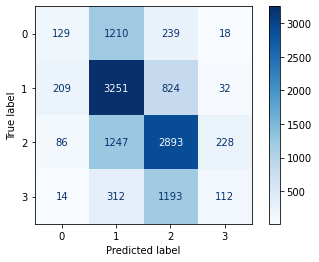

In [ ]:
ml(nn, fingerprint_data_m, fingerprint_label_m, params_nn)